DATASET: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

# BUSSINES UNDERSTANDING

Susu sapi merupakan produk utama yang dihasilkan oleh ternak sapi perah. Susu mengandung nutrisi yang cukup lengkap dan baik untuk dikonsumsi manusia. Susu mengandung protein, karbohidrat, lemak, vitamin dan mineral yang merupakan nutrisi yang sangat dibutuhkan oleh manusia.

Dengan banyaknya masyarakat yang mengkonsumsi susu sapi maka diperlukan pemilihan kualitas susu sapi yang berkualitas.

Dataset ini terdiri dari 7 variabel independen yaitu pH, Suhu, Rasa, Bau, Lemak, Kekeruhan, dan Warna.
Secara umum, Grade atau Kualitas susu tergantung pada parameter-parameter ini. Parameter ini memainkan peran penting dalam analisis prediktif susu.

Model ini dibuat untuk mempermudah masyarakat dalam menentukan mana susu yang berkualitas dan mana yang tidak. Model ini pun dibuat menggunakan metode klasifikasi dengan algoritma SVM.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [2]:
df = pd.read_csv('milknew.csv')

# DATA UNDERSTANDING

Deskripsi Tabel:

pH : PH alus susu yang berkisar antara 3 hingga 9,5 maks: 6,25 hingga 6,90

Temperature : suhu susu yang berkisar antara 34'C hingga 90'C maks: 34'C hingga 45,20'C

Taste : Rasa susu yang merupakan data kategorikal 0 (Buruk) atau 1 (Baik) maks: 1 (Baik)

Odor : Bau susu yang merupakan data kategorikal 0 (Buruk) atau 1 (Baik) maks : 0 (Buruk)

Fat : Lemak susu yang merupakan data kategorik 0 (Rendah) atau 1 (Tinggi) maks : 1 (Tinggi)

Turbidity : Kekeruhan susu yang merupakan data kategorikal 0 (Rendah) atau 1 (Tinggi) maks : 1 (Tinggi)

Colour : Warna susu yang berkisar antara 240 hingga 255 maks: 255

Grade : Tingkat (Target) susu yang merupakan data kategorikal Dimana Rendah (0) atau Sedang (1) Tinggi (2)

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.shape

(1059, 8)

In [5]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# DATA PREPARATION

In [7]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [8]:
df.replace(('low', 'medium', 'high'), (0,1,2), inplace=True) #transformasi data str to numeric

In [9]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


<Axes: >

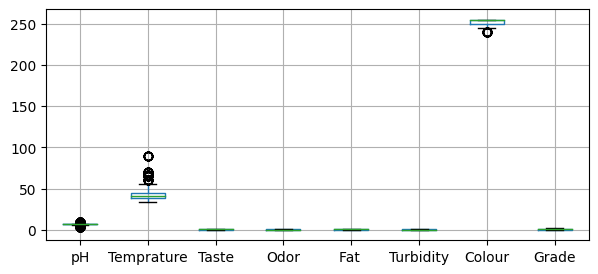

In [10]:
#Check for outliers. If present try to handle them.
plt.figure(figsize=(7,3))
df.boxplot()

<Axes: xlabel='Grade', ylabel='Count'>

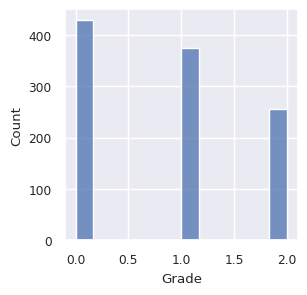

In [11]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='Grade')

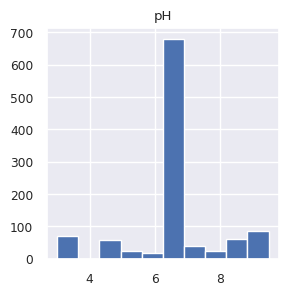

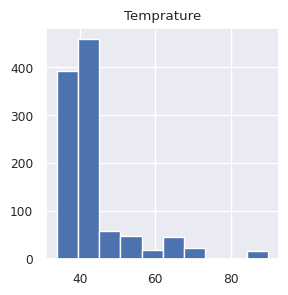

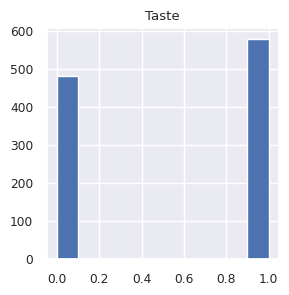

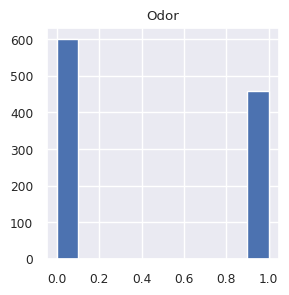

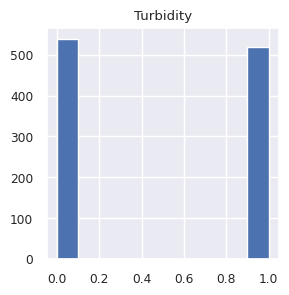

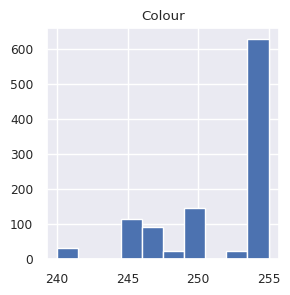

In [12]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(df[category])
    plt.title(category)
    plt.show()

# MODELLING

In [13]:
# memisahkan data dan label
X = df.drop (columns='Grade', axis=1)
Y = df['Grade']

In [14]:
print(X)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]


In [15]:
print(Y)

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64


3. Standarisasi Data

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
standarized_data = scaler.transform(X)

In [19]:
print(standarized_data)

[[-0.02153136 -0.91410734  0.91050291 ...  0.69960809 -0.98221664
   0.5016002 ]
 [-0.02153136 -0.81503461 -1.09829413 ... -1.4293717   1.01810533
   0.26933321]
 [ 1.33656414  2.55343832  0.91050291 ...  0.69960809  1.01810533
  -1.35653574]
 ...
 [-2.59476494 -0.41874368  0.91050291 ...  0.69960809  1.01810533
   0.73386719]
 [ 0.12142606 -0.12152548  0.91050291 ...  0.69960809 -0.98221664
  -0.42746777]
 [ 1.40804285  1.06734732 -1.09829413 ...  0.69960809  1.01810533
   0.73386719]]


In [20]:
X = standarized_data
Y = df['Grade']

In [21]:
print(X)
print(Y)

[[-0.02153136 -0.91410734  0.91050291 ...  0.69960809 -0.98221664
   0.5016002 ]
 [-0.02153136 -0.81503461 -1.09829413 ... -1.4293717   1.01810533
   0.26933321]
 [ 1.33656414  2.55343832  0.91050291 ...  0.69960809  1.01810533
  -1.35653574]
 ...
 [-2.59476494 -0.41874368  0.91050291 ...  0.69960809  1.01810533
   0.73386719]
 [ 0.12142606 -0.12152548  0.91050291 ...  0.69960809 -0.98221664
  -0.42746777]
 [ 1.40804285  1.06734732 -1.09829413 ...  0.69960809  1.01810533
   0.73386719]]
0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(1059, 7) (847, 7) (212, 7)


5. Membuat data latih menggunakan algoritma SVM

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [26]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.8819362455726092


In [28]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.8632075471698113


In [30]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


7. Membuat Model Prediksi

In [31]:
input_data = (6.6,35,1,0,1,0,254)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

prediction = classifier.predict(std_data)

print(prediction)
print()
if (prediction[0] == 0):
    print('Kualitas Susu Rendah')
elif (prediction[0] == 1):
    print('Kualitas Susu Sedang')
else :
    print('Kualitas Susu Tinggi')

[2]

Kualitas Susu Tinggi


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. simpan model

In [32]:
import pickle

In [33]:
filename = 'milk.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler_milk.sav','wb'))